In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics


In [2]:
def getDummy(df):
    df_dummy = pd.get_dummies(df,drop_first=True)
    
    return df_dummy

def dropYZ(df):
    df_drop = df.drop(columns=["y","z"],axis=1)
    return df_drop
    
def dropXYZ(df):
    df_drop = df.drop(columns=["x","y","z"],axis=1)
    return df_drop

def standarize(df):
    df_standar = df.set_index("id")
    

def dropPrice(df):
    df_drop = df.drop(columns=["price"],axis=1)
    return df_drop

def toCSV(df,name):
    df.to_csv(f"../outputs/{name}.csv")
    
def indexId(df):
    df_id = df.set_index("id")
    return df_id

def getStandarTrain(df):
    df = indexId(df)
    df = getDummy(df)
    df = dropXYZ(df)
    
    X = dropPrice(df)
    y = df["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [3]:
def renameCols(df):
    rename_col = {'0':'intercol_dist','1':'up_marg','2':'down_marg','3':'explot','4':'row_num',
           '5':'mod_rat','6':'interl_space','7':'weight','8':'peak_num','9':'modrat_intspace'}
    df = df.rename(columns=rename_col)
    return df


def reshapeDftr(dftr,n):
    almost500 = ['Paithonius','Clarius','Ubuntius','FerrumEffractarius',]
    team = dftr[dftr.author.isin(almost500)]

    marc = dftr[dftr.author=="Marcus"].head(n)
    phili = dftr[dftr.author=="Philippus"].head(750)
    ovi = dftr[dftr.author=="Ovionicus"].head(n)
    blanc = dftr[dftr.author=="Blanquius"].head(n)
    df = pd.concat([team,marc,phili,ovi,blanc])
    
    return df

In [4]:
# TRAINING dataset
dftr = pd.read_csv("../inputs/training_dataset.csv")
dftr.head()

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus


In [5]:
dftr.shape

(12017, 12)

In [6]:
# TEST dataset
dftt = pd.read_csv("../inputs/test_dataset.csv")
dftt.head()

,id,0,1,2,3,4,5,6,7,8,9
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303


In [7]:
dftt.shape

(8012, 11)

In [8]:
dftr = renameCols(dftr)
dftt = renameCols(dftt)

In [9]:
dftr

,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus
...,...,...,...,...,...,...,...,...,...,...,...,...
12012,12012,0.352481,0.211237,0.306755,-0.946242,0.172340,0.190314,0.371178,0.436691,0.064084,0.090426,Marcus
12013,12013,0.019197,-0.087108,0.292529,0.240776,0.172340,0.148790,-0.195078,-0.999894,-0.590727,0.365946,Marcus
12014,12014,0.624046,-2.426761,0.178724,0.711352,1.066121,-0.930856,-0.836835,0.397297,0.937165,-0.277726,Blanquius
12015,12015,0.130292,0.870736,-3.210528,0.062493,0.261718,0.522513,0.446679,1.069283,0.188810,0.338859,Marcus


In [10]:
dftt

,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303
...,...,...,...,...,...,...,...,...,...,...,...
8007,8007,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.183409,0.257927,-0.846105,-0.310094,-0.173846
8008,8008,0.426544,-0.055704,-0.084450,0.139087,0.976743,0.065740,-1.667344,-0.893692,0.313536,1.332973
8009,8009,0.574670,-0.134216,0.160942,1.252465,0.976743,0.273364,-1.214339,0.734018,1.342524,1.188263
8010,8010,-0.240024,-0.424709,0.089814,1.094532,0.261718,0.564038,0.446679,-0.103834,0.438262,0.392082


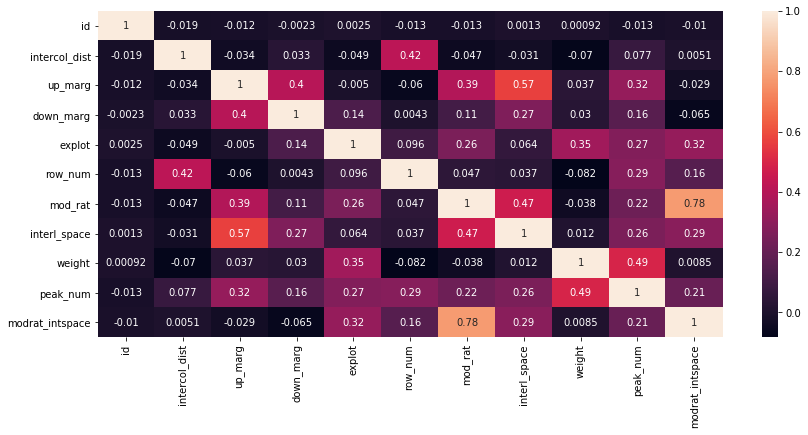

In [11]:
mc = dftr.corr()
plt.figure(figsize=(14,6))
sns.heatmap(mc,annot=True)

In [12]:
dftr.describe()

,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,6008.000000,0.019518,0.029916,-0.004594,-0.014289,0.004577,0.006347,0.030889,-0.000169,-0.009445,-0.020024
std,3469.153427,0.978726,3.654967,1.078240,0.988741,0.966598,1.112374,1.252435,1.005326,1.081102,0.984810
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090691,-5.486218,-6.719324
25%,3004.000000,-0.116585,-0.251983,0.064919,-0.542563,0.172340,-0.598658,-0.044076,-0.545477,-0.372457,-0.525687
50%,6008.000000,0.056229,-0.047852,0.214288,0.080127,0.261718,-0.058835,0.220177,0.105386,0.064084,-0.041421
75%,9012.000000,0.216699,0.203385,0.345875,0.615571,0.261718,0.564038,0.446679,0.650007,0.500624,0.508679
max,12016.000000,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


In [13]:
dftr.author.value_counts()

Marcus                5118
Philippus             2345
Ovionicus             1303
Blanquius             1017
Paithonius             643
Clarius                623
Ubuntius               539
FerrumEffractarius     429
Name: author, dtype: int64

### OPCIONES



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## FIRST TEST

In [15]:
dftr = pd.read_csv("../inputs/training_dataset.csv")
dftt = pd.read_csv("../inputs/test_dataset.csv")

dftr = renameCols(dftr)
dftt = renameCols(dftt)

dftr = reshapeDftr(dftr,650)
dftr.author.value_counts()

Philippus             750
Blanquius             650
Ovionicus             650
Marcus                650
Paithonius            643
Clarius               623
Ubuntius              539
FerrumEffractarius    429
Name: author, dtype: int64

In [16]:
X = dftr.drop(columns=["author"])
y = dftr['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3947, 11) (987, 11) (3947,) (987,)


In [17]:
model_drop = RandomForestClassifier(n_estimators = 500)

model_drop.fit(X_train,y_train)

y_pred = model_drop.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))

(987,)
                    precision    recall  f1-score   support

         Blanquius       1.00      0.99      1.00       132
           Clarius       0.97      0.99      0.98       103
FerrumEffractarius       0.99      0.97      0.98        80
            Marcus       0.80      0.90      0.85       134
         Ovionicus       0.96      0.95      0.96       143
        Paithonius       0.96      0.95      0.95       129
         Philippus       0.93      0.88      0.90       160
          Ubuntius       0.98      0.94      0.96       106

          accuracy                           0.94       987
         macro avg       0.95      0.95      0.95       987
      weighted avg       0.95      0.94      0.94       987



[[131   1   0   0   0   0   0   0]
 [  0 102   0   0   1   0   0   0]
 [  0   1  78   0   0   0   1   0]
 [  0   0   1 121   4   0   6   2]
 [  0   1   0   3 136   2   1   0]
 [  0   0   0   7   0 122   0   0]
 [  0   0   0  18   0   2 140   0]
 [  0   0   0   3   0   1   2 100]]


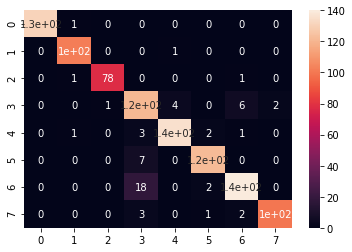

In [18]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

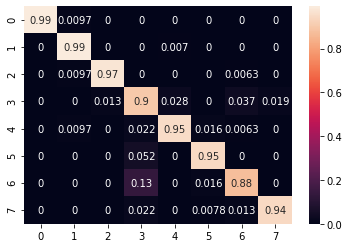

In [19]:
cm = confusion_matrix(y_test,y_pred)
totals_per_class = pd.Series(y_test).value_counts().sort_index()
cm_percent = cm/totals_per_class[None,:]
sns.heatmap(cm_percent,annot=True)

In [20]:
y_pred_testset = model_drop.predict(dftt)
y_pred_testset

array(['Marcus', 'Philippus', 'Marcus', ..., 'Blanquius', 'Clarius',
       'Paithonius'], dtype=object)

In [21]:
dftt["author"]=y_pred_testset
dftt

,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace,author
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146,Marcus
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040,Philippus
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856,Marcus
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972,Marcus
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303,Marcus
...,...,...,...,...,...,...,...,...,...,...,...,...
8007,8007,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.183409,0.257927,-0.846105,-0.310094,-0.173846,Ubuntius
8008,8008,0.426544,-0.055704,-0.084450,0.139087,0.976743,0.065740,-1.667344,-0.893692,0.313536,1.332973,Blanquius
8009,8009,0.574670,-0.134216,0.160942,1.252465,0.976743,0.273364,-1.214339,0.734018,1.342524,1.188263,Blanquius
8010,8010,-0.240024,-0.424709,0.089814,1.094532,0.261718,0.564038,0.446679,-0.103834,0.438262,0.392082,Clarius


In [22]:
dfsub = indexId(dftt)

dfsub = dfsub[['author']]

In [23]:
toCSV(dfsub,"S1_RandomForestC_drop")

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

a_s = accuracy_score(y_test,y_pred)
print(a_s)

0.9422492401215805


In [25]:
real_val_drop = 0.53

## Second model

In [26]:
dftr = pd.read_csv("../inputs/training_dataset.csv")
dftt = pd.read_csv("../inputs/test_dataset.csv")

dftr = renameCols(dftr)
dftt = renameCols(dftt)

In [27]:
X = dftr.drop(columns=["author"])
y = dftr['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9613, 11) (2404, 11) (9613,) (2404,)


In [28]:
from imblearn.over_sampling import SMOTE
'''
SMOTE reduce unbalanced testsets like the one we are working with. Simulate new values to achieve
balanced set of features.
'''
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)

(13376, 11) (13376,)


In [29]:
model_smote = RandomForestClassifier(n_estimators = 500)

model_smote.fit(X_sm,y_sm)

y_pred = model_smote.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))

(2404,)
                    precision    recall  f1-score   support

         Blanquius       1.00      1.00      1.00       210
           Clarius       1.00      1.00      1.00       134
FerrumEffractarius       0.99      1.00      0.99        76
            Marcus       0.99      1.00      0.99      1002
         Ovionicus       0.99      0.99      0.99       253
        Paithonius       0.99      0.97      0.98       135
         Philippus       0.99      0.98      0.99       487
          Ubuntius       0.99      0.98      0.99       107

          accuracy                           0.99      2404
         macro avg       0.99      0.99      0.99      2404
      weighted avg       0.99      0.99      0.99      2404



[[209   0   0   1   0   0   0   0]
 [  0 134   0   0   0   0   0   0]
 [  0   0  76   0   0   0   0   0]
 [  0   0   0 998   0   1   2   1]
 [  0   0   1   1 251   0   0   0]
 [  0   0   0   2   1 131   1   0]
 [  0   0   0   9   2   0 476   0]
 [  0   0   0   2   0   0   0 105]]


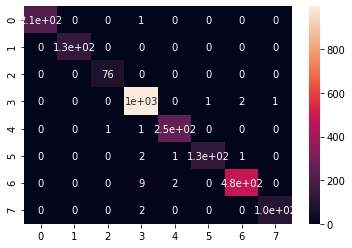

In [30]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

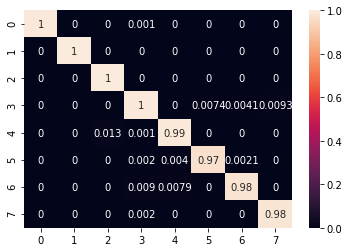

In [31]:
cm = confusion_matrix(y_test,y_pred)
totals_per_class = pd.Series(y_test).value_counts().sort_index()
cm_percent = cm/totals_per_class[None,:]
sns.heatmap(cm_percent,annot=True)

In [32]:
y_pred_testset2 = model_smote.predict(dftt)
y_pred_testset2

array(['Philippus', 'Philippus', 'Marcus', ..., 'Blanquius', 'Marcus',
       'Philippus'], dtype=object)

In [33]:
dftt["author"]=y_pred_testset2
dftt

,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace,author
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146,Philippus
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040,Philippus
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856,Marcus
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972,Marcus
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303,Marcus
...,...,...,...,...,...,...,...,...,...,...,...,...
8007,8007,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.183409,0.257927,-0.846105,-0.310094,-0.173846,Philippus
8008,8008,0.426544,-0.055704,-0.084450,0.139087,0.976743,0.065740,-1.667344,-0.893692,0.313536,1.332973,Blanquius
8009,8009,0.574670,-0.134216,0.160942,1.252465,0.976743,0.273364,-1.214339,0.734018,1.342524,1.188263,Blanquius
8010,8010,-0.240024,-0.424709,0.089814,1.094532,0.261718,0.564038,0.446679,-0.103834,0.438262,0.392082,Marcus


In [34]:
dfsub_2 = indexId(dftt)

dfsub_2 = dfsub_2[['author']]

dfsub_2

,author
id,
0,Philippus
1,Philippus
2,Marcus
3,Marcus
4,Marcus
...,...
8007,Philippus
8008,Blanquius
8009,Blanquius


In [35]:
toCSV(dfsub_2,"S2_RandomForestC_smote")

In [36]:
a_s = accuracy_score(y_test,y_pred)
print(a_s)

0.9900166389351082


## Third model

(9613, 11) (2404, 11) (9613,) (2404,)
(2404,)
                    precision    recall  f1-score   support

         Blanquius       1.00      1.00      1.00       205
           Clarius       1.00      0.96      0.98       117
FerrumEffractarius       1.00      1.00      1.00        86
            Marcus       0.98      1.00      0.99      1040
         Ovionicus       0.98      0.98      0.98       247
        Paithonius       1.00      0.97      0.99       136
         Philippus       0.99      0.97      0.98       472
          Ubuntius       1.00      0.97      0.98       101

          accuracy                           0.99      2404
         macro avg       0.99      0.98      0.99      2404
      weighted avg       0.99      0.99      0.99      2404

[[ 205    0    0    0    0    0    0    0]
 [   0  112    0    1    4    0    0    0]
 [   0    0   86    0    0    0    0    0]
 [   0    0    0 1039    0    0    1    0]
 [   0    0    0    4  243    0    0    0]
 [   0    0    0

,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace,author
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146,Philippus
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040,Philippus
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856,Marcus
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972,Marcus
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303,Marcus
...,...,...,...,...,...,...,...,...,...,...,...,...
8007,8007,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.183409,0.257927,-0.846105,-0.310094,-0.173846,Philippus
8008,8008,0.426544,-0.055704,-0.084450,0.139087,0.976743,0.065740,-1.667344,-0.893692,0.313536,1.332973,Blanquius
8009,8009,0.574670,-0.134216,0.160942,1.252465,0.976743,0.273364,-1.214339,0.734018,1.342524,1.188263,Blanquius
8010,8010,-0.240024,-0.424709,0.089814,1.094532,0.261718,0.564038,0.446679,-0.103834,0.438262,0.392082,Marcus


,author
id,
0,Philippus
1,Philippus
2,Marcus
3,Marcus
4,Marcus
...,...
8007,Philippus
8008,Blanquius
8009,Blanquius


0.9871048252911814


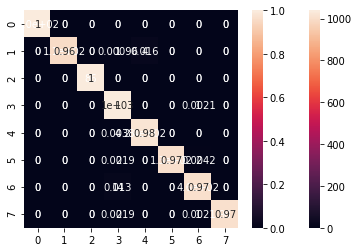

In [37]:
dftr = pd.read_csv("../inputs/training_dataset.csv")
dftt = pd.read_csv("../inputs/test_dataset.csv")

dftr = renameCols(dftr)
dftt = renameCols(dftt)

X = dftr.drop(columns=["author"])
y = dftr['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model_normal = RandomForestClassifier(n_estimators = 500)

model_normal.fit(X_train,y_train)

y_pred = model_normal.predict(X_test)
print(y_pred.shape)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

cm = confusion_matrix(y_test,y_pred)
totals_per_class = pd.Series(y_test).value_counts().sort_index()
cm_percent = cm/totals_per_class[None,:]

sns.heatmap(cm_percent,annot=True)

y_pred_testset3 = model_normal.predict(dftt)
print(y_pred_testset3)

dftt["author"]=y_pred_testset3
display(dftt)

dfsub_3 = indexId(dftt)

dfsub_3 = dfsub_3[['author']]

display(dfsub_3)

toCSV(dfsub_3,"S3_RandomForestC_normal")

a_s = accuracy_score(y_test,y_pred)
print(a_s)



## Fourth model 

In [38]:
dftr = pd.read_csv("../inputs/training_dataset.csv")
dftt = pd.read_csv("../inputs/test_dataset.csv")

dftr = renameCols(dftr)
dftt = renameCols(dftt)

In [39]:
X = dftr.drop(columns=["author"])
y = dftr['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9613, 11) (2404, 11) (9613,) (2404,)


In [40]:
from imblearn.over_sampling import SMOTE
'''
SMOTE reduce unbalanced testsets like the one we are working with. Simulate new values to achieve
balanced set of features.
'''
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)

(13410, 11) (13410,)


In [77]:
a={}
for ind, n in enumerate(range (100, 1000, 100)):
    model_smote = RandomForestClassifier(n_estimators = n)
    print("Training model",ind,"...")
    model_smote.fit(X_sm,y_sm)
    
    y_pred = model_smote.predict(X_test)
    a_s = accuracy_score(y_test,y_pred)
    a[n]=a_s
print("DONE!")
print(a)

Training model 0 ...
Training model 1 ...
Training model 2 ...
Training model 3 ...
Training model 4 ...
Training model 5 ...
Training model 6 ...
Training model 7 ...
Training model 8 ...
DONE!
{100: 0.9912645590682196, 200: 0.9908485856905158, 300: 0.9912645590682196, 400: 0.9912645590682196, 500: 0.9916805324459235, 600: 0.9916805324459235, 700: 0.990432612312812, 800: 0.9912645590682196, 900: 0.9912645590682196}


In [41]:
model_smote = RandomForestClassifier(n_estimators = 500)
model_smote.fit(X,y)
y_pred_testset4 = model_smote.predict(dftt)


dftt["author"]=y_pred_testset4
display(dftt)

dfsub_4 = indexId(dftt)

dfsub_4 = dfsub_4[['author']]

display(dfsub_4)

toCSV(dfsub_4,"S4_RandomForestC_smote_alltestset")


,id,intercol_dist,up_marg,down_marg,explot,row_num,mod_rat,interl_space,weight,peak_num,modrat_intspace,author
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146,Philippus
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040,Philippus
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856,Marcus
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972,Marcus
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303,Marcus
...,...,...,...,...,...,...,...,...,...,...,...,...
8007,8007,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.183409,0.257927,-0.846105,-0.310094,-0.173846,Philippus
8008,8008,0.426544,-0.055704,-0.084450,0.139087,0.976743,0.065740,-1.667344,-0.893692,0.313536,1.332973,Blanquius
8009,8009,0.574670,-0.134216,0.160942,1.252465,0.976743,0.273364,-1.214339,0.734018,1.342524,1.188263,Blanquius
8010,8010,-0.240024,-0.424709,0.089814,1.094532,0.261718,0.564038,0.446679,-0.103834,0.438262,0.392082,Marcus


,author
id,
0,Philippus
1,Philippus
2,Marcus
3,Marcus
4,Marcus
...,...
8007,Philippus
8008,Blanquius
8009,Blanquius
